<div class="header" , dir=rtl>
 <h1>למידת מכונה - פרוייקט קורס</h1>
</div>



<div dir=rtl>


מגישים:
אוריה שמלה - 312573744 , אור טרבלסי - 206066326

בפרוייקט זה לקחנו מאגר נתונים של ביקורות והשתמשנו בכל מיני שיטות בכדי לענות על שאלות שעניינו אותנו, בנוסף תוך כדי תנועה למדנו דברים חדשים והסקנו מסקנות.
תיאור המאגר:
מאגר נתונים זה מורכב מסקירות של מוצרי מזון מאמזון. הביקורות כוללות מידע על מוצר ומשתמש, 
דירוגים וסקירת טקסט רגיל. מאגר נתונים זה כולל גם ביקורות מכל שאר הקטגוריות של אמזון. <br> <br>
המאגר כולל:<br> 
ביקורות 568,454  <br>
משתמשים 256,059 <br>
מוצרים 74,258 <br>
260 משתמשים בעלי יותר מ50 ביק ורות <br> <br>
עמודות שהמאגר מכיל: <br> 
ID  <br>
ProductID  <br>
UserID  <br>
Score  <br>
HelpfulnessReview  <br>
Time  <br>
Text  <br>
Summary <br>
 
שאלות ששאלנו:
1. האם משתמשים נוטים להיות עקביים בביקורות שלהם? 
2.  .האם מילה מסוימת מתקשרת לביקורת חיובית או שלילית?
3.  .האם הביקורת היא חיובית או שלילית לפי טקסט הביקורת?
4.  .האם הביקורת יוצרת עניין אצל אנשים אחרים או לא נבדוק זאת באמצעות העמודה שבה אנשים 
הגיבו על ביקורת מסויימת
</div>

# :ייבוא סיפריות ונתונים

## ייבוא סיפריות

In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# ignor wornings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import warnings
warnings.filterwarnings("ignore")  
import pickle 

# tensorflow lib
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, GRU, Dense, Flatten, Bidirectional 
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


# nlp tools
import string
import re
import nltk 

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## טעינת דאטה מגוגל דרייב:


In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/ML_proj/Reviews.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA - ניתוח נתונים

## :מידע בסיסי על הנתונים

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# Check if there are any null values and drop them
print(df.isnull().sum())
df = df.dropna().reset_index()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568411 entries, 0 to 568410
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   568411 non-null  int64 
 1   Id                      568411 non-null  int64 
 2   ProductId               568411 non-null  object
 3   UserId                  568411 non-null  object
 4   ProfileName             568411 non-null  object
 5   HelpfulnessNumerator    568411 non-null  int64 
 6   HelpfulnessDenominator  568411 non-null  int64 
 7   Score                   568411 non-null  int64 
 8   Time                    568411 non-null  int64 
 9   Summary                 568411 non-null  object
 10  Text                    568411 non-null  object
dtypes: int64(6), object(5)
memory usage: 47.7+ MB


In [6]:
print("There is: " +  str(df["ProductId"].unique().size) + " products")
print("There is: " +  str(df["UserId"].unique().size) + " Users")
print("There is: " +  str(df["UserId"].size) + " reviews")

There is: 74258 products
There is: 256047 Users
There is: 568411 reviews


## :התפלגות הנתונים לפי המשתנה המוסבר (מספר הכוכבים) 1-5

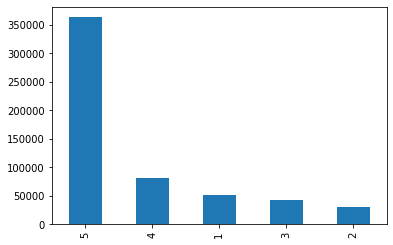

In [7]:
df["Score"].value_counts().plot.bar()

אנו יכולים לראות כי הדאטה אינו מאוזן ורוב הביקורות הן ביקורות של דירוג 5.

## בדיקת אורך הביקורת:

In [8]:
# Get the size of the reviews
df["Text_size"] = df.Text.apply(lambda x: len(str(x).split()))

הביקורות הקצרות ביותר:

In [9]:
df[df["Text_size"] == df["Text_size"].min()]

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_size
168537,168550,168551,B0001ES9F8,A33Q5O9WGJUKWN,Seth Goldstein,0,0,5,1137283200,good,they are excellent,3
453633,453668,453669,B0001QYYUK,A3S7N11XRRTUU6,Bob,5,14,1,1136246400,Not worth it,Not worth it,3


In [10]:
print("the mean reviews size is: " + str(df["Text_size"].mean()) + " words!")

the mean reviews size is: 80.26739982160795 words!


## מטריצת קורלציה:

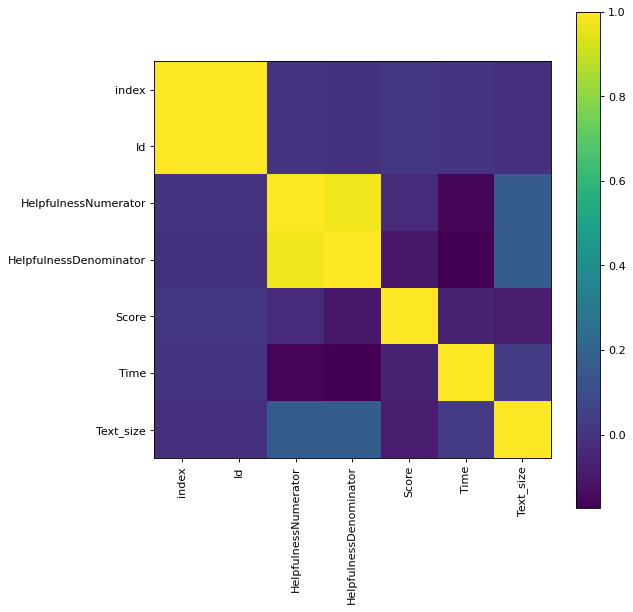

In [11]:
df1 = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
corr = df1.corr()
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.show()


## נבדוק האם ביקורת ארוכה היא בהכרח ביקורת מועילה

נראה את הביקורות הארוכות ביותר

In [12]:
slist = df[["HelpfulnessNumerator", "Text_size"]].sort_values("Text_size") # sort the list from the shortest to longest reviews.
slist.tail() 


,HelpfulnessNumerator,Text_size
541116,9,2149
68694,4,2520
496714,10,3432
455358,10,3432
290789,10,3432


נבדוק האם אורך הביקורת משפיע בצורה ישירה על האם הביקורת דורגה כמועילה

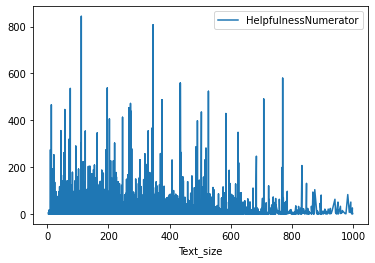

In [13]:
df2 = df[df["Text_size"] < 1000] # only reviews that shortest than 1000 words
slist = df2[[ "Text_size", "HelpfulnessNumerator"]].sort_values("Text_size")
slist.plot(x = "Text_size", y = "HelpfulnessNumerator" ) 

ניסינו למצוא קשר בין אורך הביקורת לכמה אנשים חשבו שהיא מועילה אך גילינו שאין קשר ישיר הנראה לעין, ומסתמן שאנשים ירגישו שביקורת היא מועילה לפי התוכן שלה ולא האורך.



## נבדוק האם ביקורת המדורגת גבוה היא ביקורת מועילה

נקבץ לפי הדירוג ולאחר מכן נסכום את מספר האנשים שסימנו שהביקורת מועילה, לפי דירוג הביקורות באותו מספר

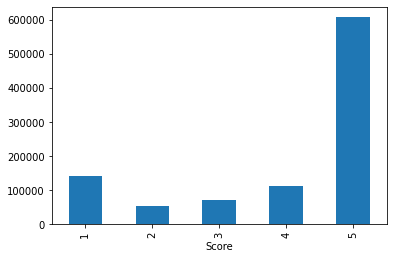

In [14]:
df.groupby("Score").sum()["HelpfulnessNumerator"].plot.bar()

ניתן לראות שביקורות "קיצוניות" נמצאו כיותר מועילות כאשר ביקורות שנתנו 5 כוכבים נמצאו המועילות ביותר!

# שאלה 1 - האם משתמשים עקביים בביקורות שלהם?

מספר האנשים עם יותר מ 20 ביקורות הוא 1702

נבדוק האם אנשים נותים להיות עקביים בביקורות שלהם על ידי "גרופ בי" לפי המשתמשים, לקיחת ממוצע ביקורות של כל משתמש ובדיקה כמה פעמים הממוצע הופיע אצל כלל המשתמשים.

להפתעתנו גילינו שיש "פיקים" במספרים עגולים לכן בדקנו האם יש אנשים שלאורך כל הביקורות שלהם נתנו את אותו הדירוג לכל המוצרים.

התשובה שגילינו היא ש241 אנשים מתוך 1702 אנשים שדירגו מעל 20 פעמים בחרו לדרג באותו הציון את כלל המוצרים שדירגו!

בנוסף אם משתמשים היו לא עקביים בדירוגים שלהם היינו צריכים לראות בגרף המצורף למטה התפלגות שקרובה להתפלגות נורמאלית אבל לא כך הדבר. בנוסף בין ציון 3.5 ל 5 יש עליה קלה ואפשר להסביר זאת גם לפי זה שרוב הבקורות הם 5.

In [15]:
gb = df.groupby("UserId").agg({ 'Score': ['mean', 'count']})
len(gb[gb[('Score', 'count')]>20])

1702

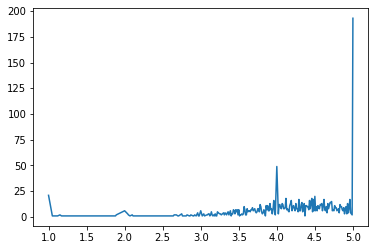

In [16]:
gb = df.groupby("UserId").agg({ 'Score': ['mean', 'count']})
avgg = gb[gb[('Score', 'count')]>20][('Score', 'mean')].round(2).value_counts().sort_index()
avgg.plot(x=('Score', 'mean'))

In [17]:
a = df.groupby("UserId").agg({ 'Score': ['mean', 'count', "max", "min"]})
a[(a[('Score', 'min')]==a[('Score', 'max')]) & (a[('Score', 'count')]>20)].groupby(('Score', 'max')).count()

Score           
              mean count  min
(Score, max)                 
1               21    21   21
2                5     5    5
3                2     2    2
4               20    20   20
5              193   193  193

 # שאלה 2 - האם מילה מסוימת מתקשרת לביקורת חיובית או שלילית

בקטע זה חילקנו את ה"ניקוד" ל1 ו 0, כאשר 1 מסמן ביקורת חיובית ו 0 ביקורת שלילית. ביקורת חיובית היא 4 או 5 כוכבים ושלילית היא 1 או 2 כוכבים.(מחקנו ביקורות נטרליות)

לאחר החלוקה הפעלנו אלגוריתם הסופר את מספר ההופעות של כל מילה ביקורת ובעזרת מודל ריגרסיה לוגיסטית בדקנו האם הביקורת מסווגת כחיובית או שלילית ומה ההשפעה של כל מילה על התוצאה.

הפלט הוא 20 המילים החיוביות ביותר ו 20 המילים השליליות ביותר!

##### code:

In [21]:
df_cv = df
df_cv = df_cv[df_cv['Score'] != 3]
y_dict = {1:0, 2:0, 4:1, 5:1}
y_cv = df_cv['Score'].map(y_dict)
X_cv = df_cv["Text"]

clf_model = LogisticRegression()

In [19]:
model = CountVectorizer(stop_words = 'english')
X_c = model.fit_transform(X_cv)
X_train, X_test, y_train, y_test = train_test_split(X_c, y_cv, random_state=0)
clf = clf_model.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))
    

w = model.get_feature_names()
coef = clf.coef_.tolist()[0]
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])

Model Accuracy: 0.9369617479687167


#### print:

In [20]:
print('')
print('-Top 20 positive-')
print(coeff_df.head(20).to_string(index=False))
print('')
print('-Top 20 negative-')        
print(coeff_df.tail(20).to_string(index=False))
    


-Top 20 positive-
      Word  Coefficient
pleasantly     4.262307
  downside     3.205504
 addicting     3.039741
 skeptical     3.018733
    hooked     2.550973
    resist     2.545110
  drawback     2.450261
    delish     2.390716
  soothing     2.373994
   worries     2.333314
  terrific     2.305953
   martini     2.215027
 delighted     2.162467
  tastiest     2.135693
    brings     2.126648
   easiest     2.115667
  grateful     2.060645
  hesitant     2.052645
     penny     2.050781
    intend     2.049001

-Top 20 negative-
          Word  Coefficient
       vomited    -2.371718
         lousy    -2.438667
    unbearable    -2.480845
        lacked    -2.485894
         blech    -2.493002
        bummer    -2.539115
disappointment    -2.578567
   unappealing    -2.583099
   disapointed    -2.601817
      mediocre    -2.686227
    overpowers    -2.716658
        ripoff    -2.755701
   embarrassed    -2.902399
    returnable    -2.903774
     cancelled    -3.006399
 disappoin

# שאלה 3 - זיהוי האם ביקורת היא חיובית אן שלילית לפי 5 מודלים

## עיבוד נתונים

תחילה בדקנו האם הנתונים מאוזנים, וראינו שיש הרבה יותר 1(ביקורות חיוביות) מ0 (ביקורות שליליות) לכן כדי שהמודל לא יהיה מוטה לכיוון הביקורות החיוביות איזנו אותו בצורה מלאכותי

לקחונו 100000 מכל סוג ביקורות ואיחדנו לטבלה אחת, לאחר מכן ערבבנו את הטבלה, עברנו על כלל הביקורות וביצענו את הפעולות הבאות:



1.   הורדנו את המילות קישור של השפה האנגלית
2.   הורדנו סימני פיסוק, מספרים ותגיות מיותרות
3.   השתמשנו באלגוריתם טוקנייזר שמוריד סיומות וכו
4.   X ו Y חילקנו ל 



code:

In [24]:
org_df = df # save the original df for later use
df.loc[(df.Score <= 3)  , "Score"] = 0
df.loc[(df.Score >= 4)  , "Score"] = 1
df["Score"] = df["Score"].astype(int)

AxesSubplot(0.125,0.125;0.775x0.755)


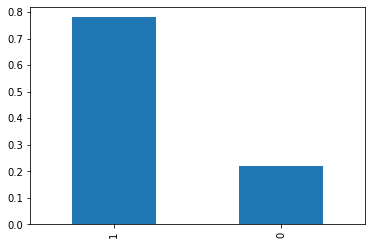

In [25]:
# prints wheter a review is positive (1) or negative (0)
print(round(df.Score.value_counts()/df.Score.size,2).plot.bar())

plt.show()

In [26]:
# balance the data!
good = df[df['Score'] == 1]
bad =  df[df['Score'] == 0]

#Set data size ans suffel 
datasize = 200000
result = pd.concat([bad[:int(datasize/2)],good[:int(datasize/2)]])
data = result.sample(frac=1).reset_index(drop=True)
data.shape

(200000, 12)

In [27]:
# use NLP 
stop_words = stopwords.words('english')
stop_words = stop_words[:100]

ps = PorterStemmer()
count = 0
def Deal_with_sentence(x):
    global count 
    x = re.sub('\d', ' ', x) #Removes Digits
    x = re.sub('<.*?>', ' ', x) #Removes Html tags
    x = x.translate(str.maketrans('', '', string.punctuation)) #Removes Punctuations
    token_sen = word_tokenize(x)
    x = " ".join([ps.stem(word) for word in token_sen if word.lower() not in stop_words])
    count += 1
    return x

score = data['Score'].copy()
Reviews = data[['Text']].copy()['Text']
Reviews = Reviews.apply(Deal_with_sentence)


# Reviews = pd.read_pickle("/content/drive/MyDrive/ML_proj/Reviews.pkl") 
# score = pd.read_pickle("/content/drive/MyDrive/ML_proj/score.pkl")

יצירת הווקטורים מהטקסט
השתמשנו בטוקנייזר ש"מחלק" לכל מילה מספר ייחודי ולאחר מכן ייצגנו את המשפטים כווקטורים לפי משפטים אלה.
ובסוף ריפדנו באפסים .


בהתחלה רצינו להשתמש בספירת מספר הופעות המילה בכל משפט ע"י ווקטור באורך כל המילים שמופיעות בביקורות ובכל פעם שמילה מופיע להוסיף 1, אבל גילינו שדרך זו לא יעילה מכיוון שזמן החישוב היה ארוך מאוד ובנוסף לא שמרנו על סדר הופעת המילים דבר שפגע מאוד בתוצאות החיזוי

In [28]:
# Make vectors from the reviews and pad with 0's
T = Tokenizer()
T.fit_on_texts(Reviews)
vectors = T.texts_to_sequences(Reviews)

longest_r= 0
for x in vectors:
    longest_r = max(len(x),longest_r)
# padding with 0 
vectors = pad_sequences(vectors, maxlen=longest_r, padding='post')

vectors

array([[  171,     6,     2, ...,     0,     0,     0],
       [ 2940,   140,   300, ...,     0,     0,     0],
       [  125,     4,   664, ...,     0,     0,     0],
       ...,
       [   12,  4645,   605, ...,     0,     0,     0],
       [   14,   102,    29, ...,     0,     0,     0],
       [ 1935,  1319, 19276, ...,     0,     0,     0]], dtype=int32)

## בניית מודלים

In [29]:
x_train, x_test, y_train, y_test = train_test_split(vectors, score, train_size=0.8, random_state=1)

In [30]:
def get_score(clf_model, x_score):
  y_true = np.array(y_test, dtype=np.int)
  y_pred = np.squeeze(np.array(clf_model.predict(x_score) >= 0.5, dtype=np.int))
  f1 = f1_score(y_true, y_pred)
  print("F1 score:", round(f1*100,2) , "%")
  acc = np.mean(np.array(y_pred == y_true, dtype=np.int))
  print("Test accuracy score:", round(acc*100,2) , "%")

  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm,fmt=".0f", annot=True)
  plt.xlabel("Predict")
  plt.ylabel("Test")
  plt.title("Confusion Matrix")
  plt.show()

### XGBOOST

F1 score: 60.25 %
Test accuracy score: 61.36 %


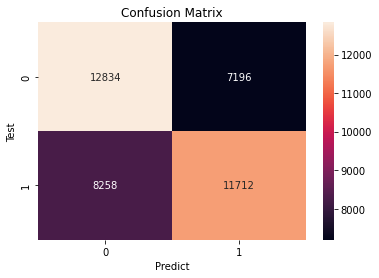

In [32]:
XG_clf = XGBClassifier(n_estimators= 100, n_jobs=-1, learning_rate=0.2, seed=0, eval_metric = 'mlogloss')
XG_clf.fit(x_train, y_train)
XG_clf.score(x_test, y_test)

# XG_clf = pickle.load(open("/content/drive/MyDrive/ML_proj/xgb.pkl", "rb"))

get_score(XG_clf, x_test)

### ADABOOST

F1 score: 58.12 %
Test accuracy score: 58.48 %


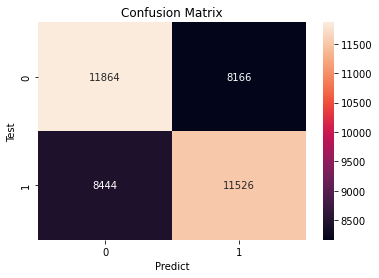

In [34]:
Ada = AdaBoostClassifier(n_estimators=50,algorithm="SAMME.R",learning_rate=0.37)
Ada.fit(x_train, y_train)

#pickle.dump(Ada, open("/content/drive/MyDrive/ML_proj/Ada.pkl", "wb"))
# Ada = pickle.load(open("/content/drive/MyDrive/ML_proj/Ada.pkl", "rb"))

get_score(Ada, x_test)

### LogisticRegression


F1 score: 59.98 %
Test accuracy score: 54.46 %


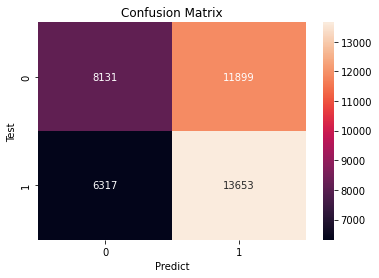

In [35]:
LR = LogisticRegression().fit(x_train, y_train)

# pickle.dump(LR, open("/content/drive/MyDrive/ML_proj/LR.pkl", "wb"))
# LR = pickle.load(open("/content/drive/MyDrive/ML_proj/LR.pkl", "rb"))

get_score(LR, x_test)


### Deep learning (RNN)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2119)]            0         
                                                                 
 embedding_1 (Embedding)     (None, 2119, 60)          5428080   
                                                                 
 bidirectional_1 (Bidirectio  (None, 2119, 480)        434880    
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1017120)           0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1017121   
                                                                 
Total params: 6,880,081
Trainable params: 6,880,081
Non-trainable params: 0
_________________________________________________

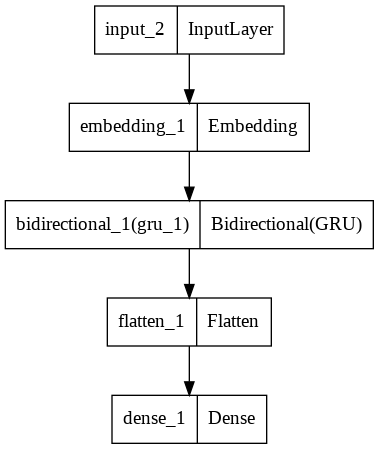

In [37]:
inputs = tf.keras.Input(shape=(longest_r,))

embedding = Embedding(
    input_dim=len(T.word_index) + 1,     #  Integer. Size of the vocabulary, maximum integer index + 1.
    input_length=longest_r, #Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten
    output_dim=60                        # Integer. Dimension of the dense embedding.
)(inputs)

Bgru = Bidirectional(
    GRU(240, return_sequences=True) # return to output each word that go to the GRU
)(embedding)

flat = Flatten()(Bgru) # flat the matrix (3D to 2D)

outputs = Dense(1, activation='sigmoid')(flat) # Dense with sigmoid to 1 output


model = tf.keras.Model(inputs, outputs) # init the model


print(model.summary())
tf.keras.utils.plot_model(model)

In [38]:
# compilt the model with adam optimizer and binary_crossentropy loss.
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# fit the model and save as history for ploting
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=10,
    # set EarlyStopping to prevent overfitting and spending time. 
    # if the val_accuracy don't improved for 2 epochs stop, and return to best weight!
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=2,
            restore_best_weights=True
        )
    ]
)

model.save('/content/drive/MyDrive/ML_proj/gru')
pickle.dump(history, open("/content/drive/MyDrive/ML_proj/history.pkl", "wb"))
# model = tf.keras.models.load_model('/content/drive/MyDrive/ML_proj/gru')

Epoch 1/10
2000/2000 [==============================] - 642s 319ms/step - loss: 0.3693 - accuracy: 0.8425 - val_loss: 0.3217 - val_accuracy: 0.8692
Epoch 2/10
2000/2000 [==============================] - 636s 318ms/step - loss: 0.2239 - accuracy: 0.9144 - val_loss: 0.2927 - val_accuracy: 0.8867
Epoch 3/10
2000/2000 [==============================] - 637s 318ms/step - loss: 0.1225 - accuracy: 0.9552 - val_loss: 0.3570 - val_accuracy: 0.8835
Epoch 4/10
2000/2000 [==============================] - 636s 318ms/step - loss: 0.0656 - accuracy: 0.9772 - val_loss: 0.4740 - val_accuracy: 0.8813


INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_proj/gru/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_proj/gru/assets


INFO:tensorflow:Assets written to: ram://ca554cab-b239-4746-a54b-55593e77fcd2/assets


INFO:tensorflow:Assets written to: ram://ca554cab-b239-4746-a54b-55593e77fcd2/assets


F1 score: 88.98 %
Test accuracy score: 88.98 %


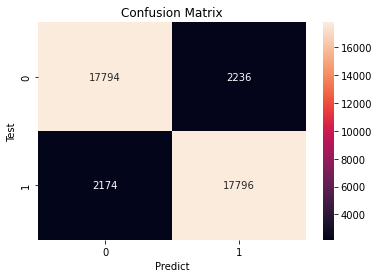

In [39]:
get_score(model, x_test)

אפפשר לראות ש"האיפוק" השני הוא הטוב ביותר מבחינת הוולידציה לכן לאחר 2 ריצות שהמודל ראה שאין שיפור חזרנו לאיפוק השני

In [40]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

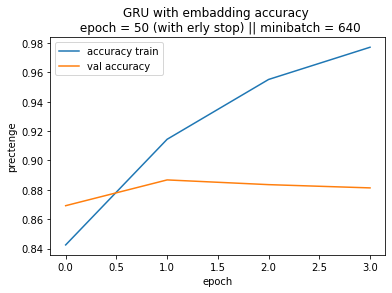

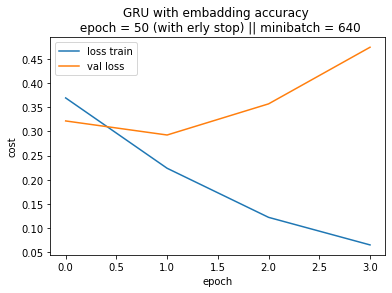

In [41]:
plt.plot(accuracy, label="accuracy train")
plt.plot(val_accuracy, label="val accuracy")
plt.title("GRU with embadding accuracy \n epoch = 50 (with erly stop) || minibatch = 640")
plt.ylabel("prectenge")
plt.xlabel("epoch")
plt.legend()
plt.show()



plt.plot(loss, label = "loss train")
plt.plot(val_loss, label = "val loss")
plt.title("GRU with embadding accuracy \n epoch = 50 (with erly stop) || minibatch = 640")
plt.ylabel("cost")
plt.xlabel("epoch")
plt.legend()
plt.show()

 ### NLTK ניתוח סנטימנטים בעזרת מודל מוכל מספריית 

בנוסף למודלים שהשתמשנו עד כה רצינו לבדוק האם יש קשר בין סנטימטי הביקורת לציון שניתן ע"י אותו המבקר, 
 לצורך זה השתמשנו במודל לניתוח סנטימנטים ובדקנו האם יש קשר ומה הציון שנקבל.

 כמצופה ראינו שיש הקשר ישיר, סיווגנו ביקורות עם סנטימנט שלילי לביקורות שליליות ולהפך, לאחר מכן השתמשנו במדדים לבדיקת הציון וראינו שנקבל ב"אפ-1" ציון של 89% ובציו דיוק קיבלנו 82%.

In [42]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [43]:
sia = SentimentIntensityAnalyzer()

In [44]:
neg_pos = []
for i in df["Text"]:
  sia_res = sia.polarity_scores(i)
  if sia_res['neg'] > sia_res['pos']:
    neg_pos.append(0)
  else:
    neg_pos.append(1)


In [45]:
y_true = np.array(df["Score"], dtype=np.int)
y_pred = np.squeeze(np.array(neg_pos, dtype=np.int))
f1 = f1_score(y_true, y_pred)
print("F1 score:", round(f1*100,2) , "%")
acc = np.mean(np.array(y_pred == y_true, dtype=np.int))
print("Test accuracy score:", round(acc*100,2) , "%")

F1 score: 89.07 %
Test accuracy score: 81.72 %


# שאלה 4 - האם ביקורת מעלה התעניינות בקרב משתמשים אחרים

בשאלה זו נשתמש בביקורות לסיווג משתנה מוסבר אחר

 HelpfulnessDenominator ההגדרה שלנו לביקורת מעניינת היא ביקורת שקיבלה יותר מ-2

## עיבוד נתונים

In [46]:
data1 = org_df
data1.loc[(org_df.HelpfulnessDenominator <= 2)  , "helpfull"] = 0
data1.loc[(org_df.HelpfulnessDenominator >= 3)  , "helpfull"] = 1
data1["helpfull"] = org_df["helpfull"].astype(int)



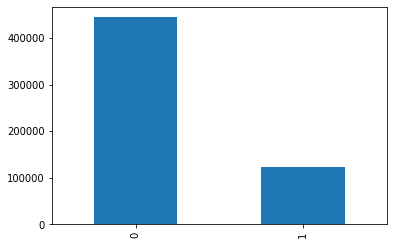

In [47]:
data1["helpfull"].value_counts().plot.bar()

In [48]:
# balance the data!
good = data1[data1['helpfull'] == 1]
bad =  data1[data1['helpfull'] == 0]

#Set data size ans suffel 
datasize = 200000
result = pd.concat([bad[:int(datasize/2)],good[:int(datasize/2)]])
data1 = result.sample(frac=1).reset_index(drop=True)
data1.shape

(200000, 13)

In [49]:
# use NLP 
stop_words = stopwords.words('english')
stop_words = stop_words[:100]

ps = PorterStemmer()
count = 0
def Deal_with_sentence(x):
    global count 
    x = re.sub('\d', ' ', x) #Removes Digits
    x = re.sub('<.*?>', ' ', x) #Removes Html tags
    x = x.translate(str.maketrans('', '', string.punctuation)) #Removes Punctuations
    token_sen = word_tokenize(x)
    x = " ".join([ps.stem(word) for word in token_sen if word.lower() not in stop_words])
    count += 1
    if count % 10000 == 0:
        print(count)
    return x

# score = data1['helpfull'].copy()
# Reviews = data1[['Text']].copy()['Text']
# Reviews = Reviews.apply(Deal_with_sentence)

In [50]:
# score.to_pickle("/content/drive/MyDrive/ML_proj/helpfull.pkl")
# Reviews.to_pickle("/content/drive/MyDrive/ML_proj/Reviews_h.pkl")
Reviews = pd.read_pickle("/content/drive/MyDrive/ML_proj/Reviews_h.pkl") 
score = pd.read_pickle("/content/drive/MyDrive/ML_proj/helpfull.pkl")

In [51]:
# Make vectors from the reviews and pad with 0's
T = Tokenizer()
T.fit_on_texts(Reviews)
vectors = T.texts_to_sequences(Reviews)

longest_r= 0
for x in vectors:
    longest_r = max(len(x),longest_r)
# padding with 0 
vectors = pad_sequences(vectors, maxlen=longest_r, padding='post')

vectors

array([[  88,  206,  227, ...,    0,    0,    0],
       [  39,   10,    7, ...,    0,    0,    0],
       [ 130,    3,   55, ...,    0,    0,    0],
       ...,
       [  29,  120, 1710, ...,    0,    0,    0],
       [ 333,  969,   63, ...,    0,    0,    0],
       [   9,   34, 6013, ...,    0,    0,    0]], dtype=int32)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(vectors, score, train_size=0.8, random_state=1)

## בניית מודלים

### XGBOOST

F1 score: 57.63 %
Test accuracy score: 59.47 %


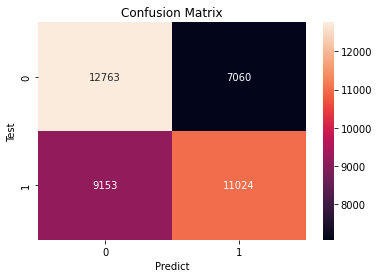

In [53]:
# XG_clf_h = XGBClassifier(n_estimators= 100, n_jobs=-1, learning_rate=0.2, seed=0)
# XG_clf_h.fit(x_train, y_train)
# XG_clf_h.score(x_test, y_test)
# pickle.dump(XG_clf_h, open("/content/drive/MyDrive/ML_proj/XG_h.pkl", "wb"))
XG_clf_h = pickle.load(open("/content/drive/MyDrive/ML_proj/XG_h.pkl", "rb"))
get_score(XG_clf_h, x_test)


### ADABOOST

F1 score: 55.98 %
Test accuracy score: 58.29 %


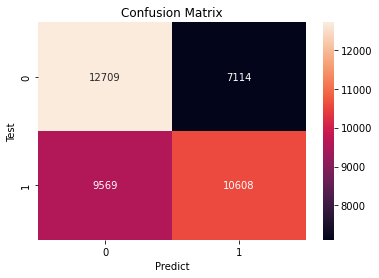

In [60]:
Ada = AdaBoostClassifier(n_estimators=50,algorithm="SAMME.R",learning_rate=0.37)
Ada.fit(x_train, y_train)

pickle.dump(Ada, open("/content/drive/MyDrive/ML_proj/Ada_h.pkl", "wb"))
# Ada = pickle.load(open("/content/drive/MyDrive/ML_proj/Ada_h.pkl", "rb"))

get_score(Ada, x_test)

### LogisticRegression

F1 score: 56.54 %
Test accuracy score: 57.04 %


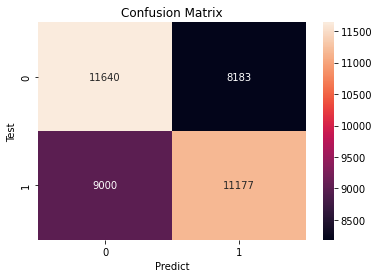

In [54]:
import pickle
# LR_h = LogisticRegression().fit(x_train, y_train)
LR_h = pickle.load(open("/content/drive/MyDrive/ML_proj/LR_h.pkl", "rb"))
get_score(LR_h, x_test)
# pickle.dump(LR_h, open("/content/drive/MyDrive/ML_proj/LR_h.pkl", "wb"))

### Deep learning (RNN)

In [57]:
# compilt the model with adam optimizer and binary_crossentropy loss.
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# fit the model and save as history for ploting
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=10,
    # set EarlyStopping to prevent overfitting and spending time. 
    # if the val_accuracy don't improved for 2 epochs stop, and return to best weight!
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=2,
            restore_best_weights=True
        )
    ]
)

# model.save('/content/drive/MyDrive/ML_proj/gru_h')
# model = tf.keras.models.load_model('/content/drive/MyDrive/ML_proj/gru_h')

Epoch 1/10
2000/2000 [==============================] - 640s 319ms/step - loss: 0.2782 - accuracy: 0.8836 - val_loss: 0.7821 - val_accuracy: 0.6937
Epoch 2/10
2000/2000 [==============================] - 637s 319ms/step - loss: 0.1692 - accuracy: 0.9364 - val_loss: 0.9646 - val_accuracy: 0.6949
Epoch 3/10
2000/2000 [==============================] - 637s 318ms/step - loss: 0.1278 - accuracy: 0.9595 - val_loss: 1.1124 - val_accuracy: 0.6938
Epoch 4/10
2000/2000 [==============================] - 637s 318ms/step - loss: 0.1013 - accuracy: 0.9723 - val_loss: 1.2993 - val_accuracy: 0.6882


In [58]:
model.save('/content/drive/MyDrive/ML_proj/gru_h')
pickle.dump(history, open("/content/drive/MyDrive/ML_proj/history_h.pkl", "wb"))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_proj/gru_h/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_proj/gru_h/assets


INFO:tensorflow:Assets written to: ram://02a97101-c988-4c34-9644-236cc0d8eb28/assets


INFO:tensorflow:Assets written to: ram://02a97101-c988-4c34-9644-236cc0d8eb28/assets


F1 score: 69.09 %
Test accuracy score: 69.23 %


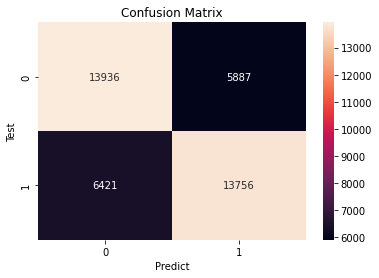

In [59]:
get_score(model, x_test)

In [61]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

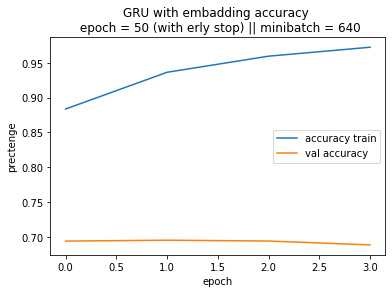

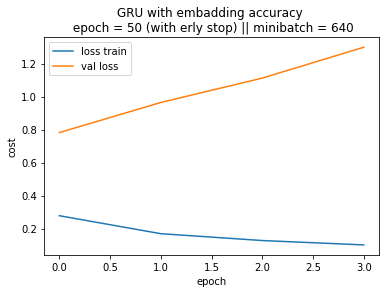

In [62]:
plt.plot(accuracy, label="accuracy train")
plt.plot(val_accuracy, label="val accuracy")
plt.title("GRU with embadding accuracy \n epoch = 50 (with erly stop) || minibatch = 640")
plt.ylabel("prectenge")
plt.xlabel("epoch")
plt.legend()
plt.show()



plt.plot(loss, label = "loss train")
plt.plot(val_loss, label = "val loss")
plt.title("GRU with embadding accuracy \n epoch = 50 (with erly stop) || minibatch = 640")
plt.ylabel("cost")
plt.xlabel("epoch")
plt.legend()
plt.show()